In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#Reading data of StudentsPerformance_100 which is present in my current directory in my condition
df = pd.read_csv('StudentsPerformance_100.csv')

In [31]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group E,high school,free/reduced,none,83,46,79
1,male,group D,master's degree,standard,completed,37,66,86
2,male,group D,some high school,free/reduced,completed,18,24,17


In [32]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       100 non-null    object
 1   race/ethnicity               100 non-null    object
 2   parental level of education  100 non-null    object
 3   lunch                        100 non-null    object
 4   test preparation course      100 non-null    object
 5   math score                   100 non-null    int64 
 6   reading score                100 non-null    int64 
 7   writing score                100 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [35]:
score_columns = df.select_dtypes(include = "int64").columns

#method of filling null values of numerical column by simple method 
for cols in score_columns:
    if df[cols].isnull().any():
        mean_val = np.nanmean(df[col])
        df[col].fillna(mean_val,inplace = True)

#method of filling null values of numerical column by sklearn method
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy = 'mean')
df[score_columns]=si.fit_transform(df[score_columns])

In [38]:
#getting the another column average score
df["average score"] = df[["math score","reading score","writing score"]].mean(axis=1)

In [39]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group E,high school,free/reduced,none,83.0,46.0,79.0,69.333333
1,male,group D,master's degree,standard,completed,37.0,66.0,86.0,63.000000
2,male,group D,some high school,free/reduced,completed,18.0,24.0,17.0,19.666667


In [40]:
#getting all students having average score >= 60
df_filtered= df[df['average score'] >= 60]

In [41]:
df_filtered.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group E,high school,free/reduced,none,83.0,46.0,79.0,69.333333
1,male,group D,master's degree,standard,completed,37.0,66.0,86.0,63.000000
8,male,group D,bachelor's degree,free/reduced,none,85.0,95.0,69.0,83.000000


In [42]:
#reseting index fo new dataframe df_filtered
df_filtered.reset_index(drop=True,inplace=True)

In [43]:
df_filtered.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group E,high school,free/reduced,none,83.0,46.0,79.0,69.333333
1,male,group D,master's degree,standard,completed,37.0,66.0,86.0,63.000000
2,male,group D,bachelor's degree,free/reduced,none,85.0,95.0,69.0,83.000000


In [44]:
#grouping the all subjects by gender
avg_scores=df.groupby('gender')[['math score','reading score','writing score']].mean().reset_index()

In [45]:
avg_scores

,gender,math score,reading score,writing score
0,female,54.211538,50.846154,49.519231
1,male,50.416667,47.104167,47.625000


In [15]:
#Getting maximum average score of a student
max_avg = df['average score'].max()

In [46]:
#Getting dataframe corresponding to the maximum average score
df[df['average score'] == max_avg]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
31,male,group B,associate's degree,free/reduced,completed,95.0,93.0,95.0,94.333333


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       100 non-null    object 
 1   race/ethnicity               100 non-null    object 
 2   parental level of education  100 non-null    object 
 3   lunch                        100 non-null    object 
 4   test preparation course      100 non-null    object 
 5   math score                   100 non-null    float64
 6   reading score                100 non-null    float64
 7   writing score                100 non-null    float64
 8   average score                100 non-null    float64
dtypes: float64(4), object(5)
memory usage: 7.2+ KB


In [18]:
#assigning grades by simple method
# for i in range(len(df)):
#     score = df.loc[i,'average score']
#     if score >=85:
#         df.loc[i,'grade'] = 'A'
#     elif score >=70:
#         df.loc[i,'grade'] = 'B'
#     elif score >=60:
#         df.loc[i,'grade'] = 'C'
#     else:
#         df.loc[i,'grade'] = 'D'

In [19]:
#Assigning grades using built-in apply function 
def assign_grade(score):
    if score>=85:
        return 'A'
    elif score >= 70:
        return 'B'
    elif score >= 60:
        return 'C'
    else:
        return 'D'
df['grade'] = df['average score'].apply(assign_grade)

In [48]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group E,high school,free/reduced,none,83.0,46.0,79.0,69.333333
1,male,group D,master's degree,standard,completed,37.0,66.0,86.0,63.000000
2,male,group D,some high school,free/reduced,completed,18.0,24.0,17.0,19.666667


In [51]:
#Saving the all changes of StudentPerformance_100 into students_processed 
df.to_csv('students_processed.csv',index = False)

In [53]:
#Checking avg_scores becaues we are going to work on it
avg_scores

,gender,math score,reading score,writing score
0,female,54.211538,50.846154,49.519231
1,male,50.416667,47.104167,47.625000


<h4>Bar chart</h4>

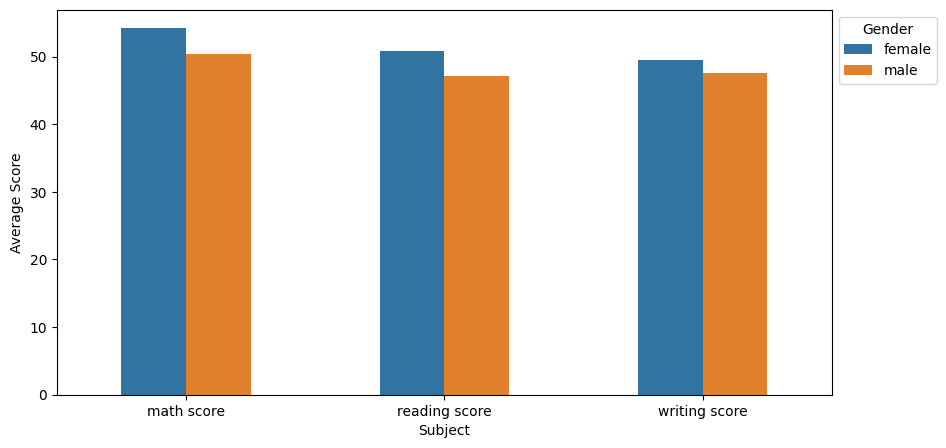

In [50]:
#bar chart by gender
df_melted = avg_scores.melt(id_vars="gender", 
                                      value_vars=["math score", "reading score", "writing score"],
                                      var_name="Subject", 
                                      value_name="Average Score")
plt.figure(figsize=(10,5))
sns.barplot(x = 'Subject', y = 'Average Score', data = df_melted, hue = 'gender', width = 0.5)
plt.legend(title = "Gender", loc = 'upper left',bbox_to_anchor = (1,1))